In [2]:
import pandas as pd
import pyfolio as pf
import seaborn as sns
from matplotlib import pyplot, warnings

warnings.filterwarnings("ignore")

/home/narboom23/anaconda3/envs/licenta/lib/python3.8/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [3]:
FINAL_RESULTS_PATH = f"results/final_results.csv"

In [4]:
def show_pyfolio_for_strat(strat):
    returns = pd.read_csv(
        f"results/weekly/extra/returns/{strat}_returns.csv",
        squeeze=True,
        parse_dates=["index"],
    )
    returns

    s = pd.Series(
        data=dict(zip(list(returns["index"]), list(returns["return"]))),
        index=returns["index"],
    )
    pf.create_simple_tear_sheet(s)

In [5]:
def get_df_index_sorted_by(field):
    return df.fillna(-1).sort_values(field)[field]

In [6]:
def get_table_for_perc(perc):
    return (
        df[df.index.str.startswith(f"{perc}_")][
            [
                "Annual return",
                "Cumulative returns",
                "Sharpe ratio",
                "Sortino ratio",
                "Max drawdown",
            ]
        ]
        .describe()
        .drop("count")
    )

In [7]:
df = pd.read_csv(FINAL_RESULTS_PATH, index_col=0)

In [8]:
df.sample(5)

,Annual return,Cumulative returns,Annual volatility,Sharpe ratio,Calmar ratio,Stability,Max drawdown,Omega ratio,Sortino ratio,Skew,Kurtosis,Tail ratio,Daily value at risk
25_weekly_12-month_mean_order_single_best,0.546037,5.640571,0.225421,2.047108,3.168689,0.979974,-0.172323,1.544869,3.186526,-0.120056,6.052284,1.336870,-0.026569
3_daily_12-month_order_order_single_best,0.087646,4.820142,0.124161,0.738981,0.315007,0.960506,-0.278234,1.155007,1.036363,-0.423483,7.088636,1.001644,-0.015279
10_weekly_6-month_order_None_single_upper,0.479641,4.487447,0.216955,1.915765,2.596964,0.971924,-0.184693,1.481137,2.921833,-0.176509,5.590258,1.304380,-0.025684
3_daily_6-month_mean_None_single_best,0.027636,0.770941,0.039430,0.711119,0.245134,0.957966,-0.112739,1.299919,1.060017,0.473274,67.762474,1.457132,-0.004856
20_daily_6-month_order_order_single_upper,0.089789,5.065358,0.166404,0.600179,0.185727,0.917163,-0.483445,1.129284,0.847892,-0.216276,17.629172,0.971134,-0.020569


In [9]:
get_table_for_perc(5)

,Annual return,Cumulative returns,Sharpe ratio,Sortino ratio,Max drawdown
mean,0.234885,2.738378,1.266616,1.842193,-0.215637
std,0.140010,1.279780,0.431668,0.685018,0.067060
min,0.032881,0.597769,0.432621,0.593376,-0.377301
25%,0.084526,1.945823,0.785520,1.129949,-0.269063
50%,0.294565,2.406425,1.401219,1.932104,-0.184454
75%,0.338968,3.624881,1.610673,2.354514,-0.164927
max,0.505464,6.239000,1.906615,2.972562,-0.133275


In [10]:
get_df_index_sorted_by("Max drawdown")

25_daily_12-month_mean_order_single_best    -0.557119
25_daily_12-month_mean_order_single_upper   -0.557119
25_daily_6-month_order_order_single_best    -0.515744
25_daily_6-month_order_order_single_upper   -0.515744
20_daily_12-month_mean_order_single_upper   -0.488512
                                               ...   
3_weekly_6-month_mean_None_single_lower     -0.110112
3_weekly_6-month_mean_order_single_best     -0.110112
3_weekly_6-month_mean_order_single_upper    -0.110112
3_weekly_6-month_mean_order_single_best     -0.110112
3_weekly_6-month_mean_order_single_upper    -0.110112
Name: Max drawdown, Length: 790, dtype: float64

### Graph percentage - metric - measurement combinations

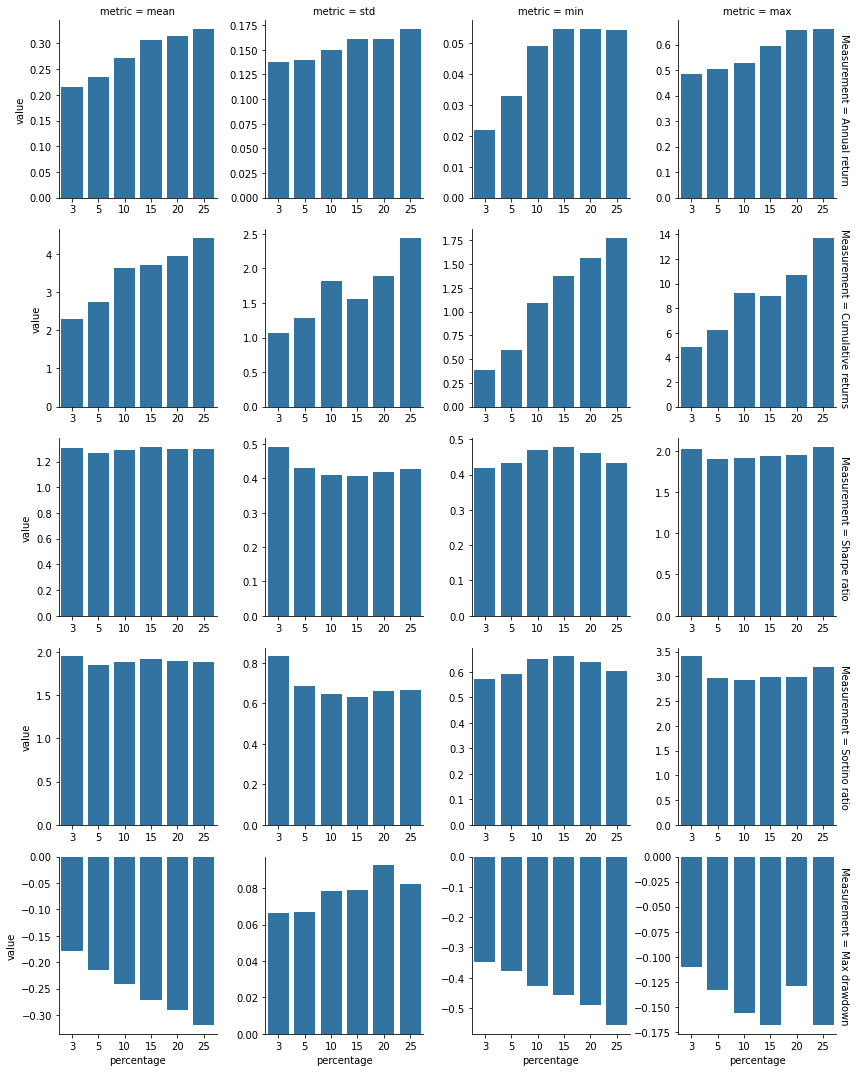

In [13]:
df_list = []

for perc in [3, 5, 10, 15, 20, 25]:
    tmp_df = (
        df[df.index.str.startswith(f"{perc}_")][
            [
                "Annual return",
                "Cumulative returns",
                "Sharpe ratio",
                "Sortino ratio",
                "Max drawdown",
            ]
        ]
        .describe()
        .drop("count")
    )
    tmp_df["percentage"] = perc
    df_list.append(tmp_df)

bigdf = pd.concat(df_list).reset_index()
bigdf = bigdf.rename(columns={"index": "metric"})

filtereddf_list = []
meass = [
    "Annual return",
    "Cumulative returns",
    "Sharpe ratio",
    "Sortino ratio",
    "Max drawdown",
]
for meas in meass:
    cpdf = bigdf.copy()
    cpdf["Measurement"] = meas
    cpdf["value"] = bigdf[meas]
    cpdf = cpdf.drop(meass, axis=1)
    filtereddf_list.append(cpdf)

filtereddf = pd.concat(filtereddf_list)
filtereddf = filtereddf[~filtereddf["metric"].isin(["25%", "50%", "75%"])]

g = sns.FacetGrid(
    filtereddf,
    col="metric",
    row="Measurement",
    margin_titles=True,
    sharex=False,
    sharey=False,
)

g.map(sns.barplot, "percentage", "value")

### Graph function

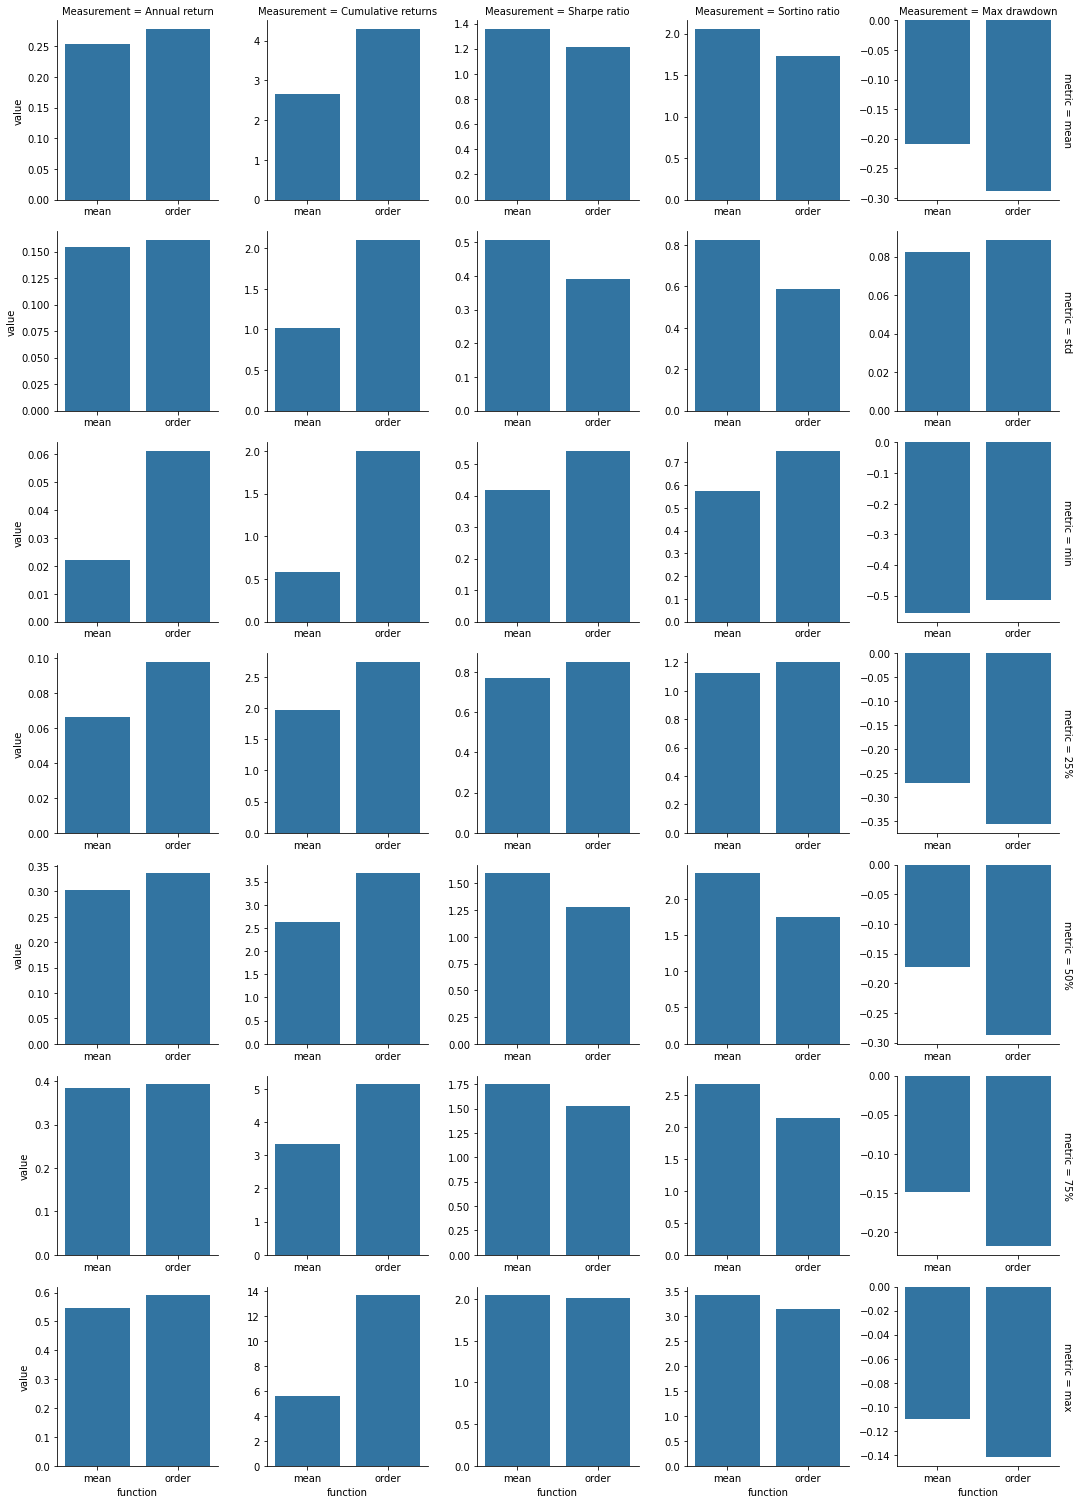

In [14]:
df_list = []

for func in ["mean", "order"]:  # , 'None']:
    tmp_df = (
        df[df.index.str.contains(f"^\d+_(weekly|daily)_\d+\-month_{func}")][
            [
                "Annual return",
                "Cumulative returns",
                "Sharpe ratio",
                "Sortino ratio",
                "Max drawdown",
            ]
        ]
        .describe()
        .drop("count")
    )
    tmp_df["function"] = func
    df_list.append(tmp_df)

bigdf = pd.concat(df_list).reset_index()
bigdf = bigdf.rename(columns={"index": "metric"})


filtereddf_list = []
meass = [
    "Annual return",
    "Cumulative returns",
    "Sharpe ratio",
    "Sortino ratio",
    "Max drawdown",
]
for meas in meass:
    cpdf = bigdf.copy()
    cpdf["Measurement"] = meas
    cpdf["value"] = bigdf[meas]
    cpdf = cpdf.drop(meass, axis=1)
    filtereddf_list.append(cpdf)

filtereddf = pd.concat(filtereddf_list)
# filtereddf = filtereddf[~filtereddf['metric'].isin(['25%', '50%', '75%'])]

g = sns.FacetGrid(
    filtereddf,
    row="metric",
    col="Measurement",
    margin_titles=True,
    sharex=False,
    sharey=False,
)  # , height=1.7, aspect=4,)

g.map(sns.barplot, "function", "value")

### List display function min, max, std, percentiles

In [15]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)


for i in [
    "Annual return",
    "Cumulative returns",
    "Sharpe ratio",
    "Sortino ratio",
    "Max drawdown",
]:
    print()

    print(i)
    print()
    print(bigdf.groupby("function").describe()[i])


Annual return

          count      mean       std       min       25%       50%       75%       max
function                                                                             
mean        7.0  0.246867  0.184054  0.021972  0.110007  0.253994  0.343025  0.546037
order       7.0  0.274106  0.186240  0.061062  0.129257  0.278279  0.364734  0.591418

Cumulative returns

          count      mean       std       min       25%       50%       75%        max
function                                                                              
mean        7.0  2.549586  1.673370  0.577182  1.492376  2.625962  3.009317   5.640571
order       7.0  4.808985  4.088793  1.997688  2.421352  3.684118  4.716161  13.706061

Sharpe ratio

          count      mean       std       min       25%       50%       75%       max
function                                                                             
mean        7.0  1.206874  0.642621  0.418930  0.638803  1.356885  1.673794  2.04710

### Restricted function, metric, bounds combinations

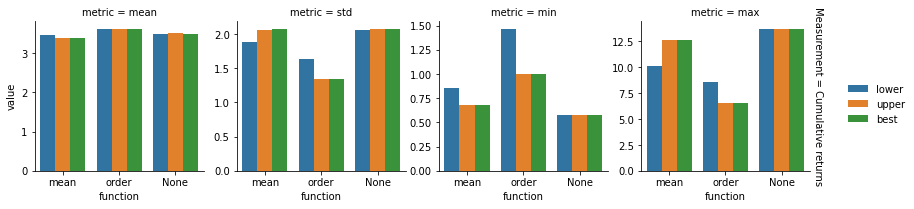

In [16]:
df_list = []

for func in ["mean", "order", "None"]:
    for bar_type in ["lower", "upper", "best"]:
        tmp_df = (
            df[
                df.index.str.contains(
                    f"^\d+_(weekly|daily)_\d+\-month_(mean|order)_{func}_single_{bar_type}"
                )
            ][
                [
                    "Annual return",
                    "Cumulative returns",
                    "Sharpe ratio",
                    "Sortino ratio",
                    "Max drawdown",
                ]
            ]
            .describe()
            .drop("count")
        )
        tmp_df["function"] = func
        tmp_df["barrier type"] = bar_type
        df_list.append(tmp_df)

bigdf = pd.concat(df_list).reset_index()
bigdf = bigdf.rename(columns={"index": "metric"})

filtereddf_list = []
meass = [
    "Annual return",
    "Cumulative returns",
    "Sharpe ratio",
    "Sortino ratio",
    "Max drawdown",
]
for meas in meass:
    cpdf = bigdf.copy()
    if meas in ["Cumulative returns"]:  # , 'Cumulative returns', 'Max drawdown']:
        cpdf["Measurement"] = meas
        cpdf["value"] = bigdf[meas]
    cpdf = cpdf.drop(meass, axis=1)
    filtereddf_list.append(cpdf)

filtereddf = pd.concat(filtereddf_list)
filtereddf = filtereddf[~filtereddf["metric"].isin(["25%", "50%", "75%"])]

g = sns.FacetGrid(
    filtereddf,
    col="metric",
    row="Measurement",
    margin_titles=True,
    sharex=False,
    sharey=False,
)  # , height=1.7, aspect=4,)

g.map(sns.barplot, "function", "value", "barrier type", palette="tab10")
g.add_legend()

### Timeframe barplots

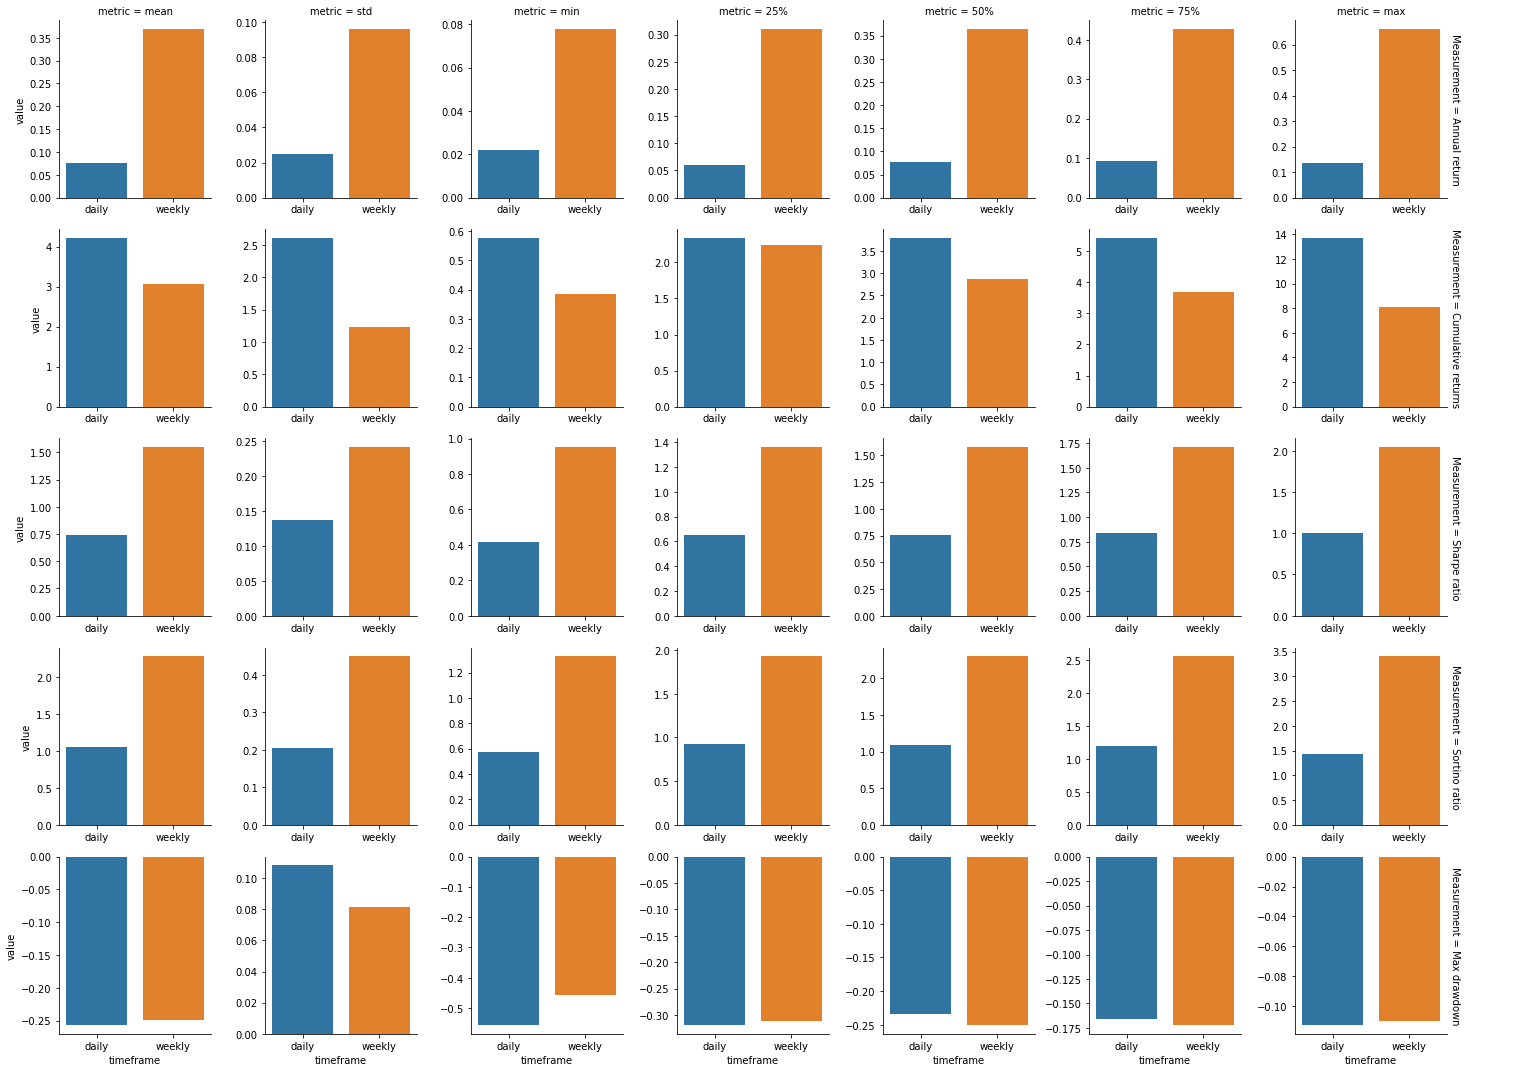

In [17]:
df_list = []

for func in ["daily", "weekly"]:
    tmp_df = (
        df[df.index.str.contains(f"^\d+_{func}")][
            [
                "Annual return",
                "Cumulative returns",
                "Sharpe ratio",
                "Sortino ratio",
                "Max drawdown",
            ]
        ]
        .describe()
        .drop("count")
    )
    tmp_df["timeframe"] = func
    df_list.append(tmp_df)

bigdf = pd.concat(df_list).reset_index()
bigdf = bigdf.rename(columns={"index": "metric"})

filtereddf_list = []
meass = [
    "Annual return",
    "Cumulative returns",
    "Sharpe ratio",
    "Sortino ratio",
    "Max drawdown",
]
for meas in meass:
    cpdf = bigdf.copy()
    #     if meas in ['Cumulative returns']:#, 'Cumulative returns', 'Max drawdown']:
    cpdf["Measurement"] = meas
    cpdf["value"] = bigdf[meas]
    cpdf = cpdf.drop(meass, axis=1)
    filtereddf_list.append(cpdf)

filtereddf = pd.concat(filtereddf_list)
# filtereddf = filtereddf[~filtereddf['metric'].isin(['25%', '50%', '75%'])]

g = sns.FacetGrid(
    filtereddf,
    col="metric",
    row="Measurement",
    margin_titles=True,
    sharex=False,
    sharey=False,
)  # , height=1.7, aspect=4,)

g.map(sns.barplot, "timeframe", "value", palette="tab10")
g.add_legend()

### Measurement and timeframe comparison table

In [18]:
filtereddf.groupby(["Measurement", "timeframe"]).describe()["value"].drop(
    ["count"], axis=1
)

mean       std       min       25%       50%       75%        max
Measurement        timeframe                                                                       
Annual return      daily      0.069943  0.039858  0.021972  0.042077  0.076300  0.085179   0.136815
                   weekly     0.329775  0.200453  0.077908  0.203310  0.364824  0.398578   0.661913
Cumulative returns daily      4.666142  4.274114  0.577182  2.474127  3.795309  4.818093  13.706061
                   weekly     3.081617  2.480114  0.385398  1.736707  2.863164  3.379340   8.090662
Max drawdown       daily     -0.219640  0.203105 -0.557119 -0.288523 -0.233362 -0.139198   0.108442
                   weekly    -0.209851  0.168575 -0.456380 -0.281390 -0.248659 -0.141218   0.081298
Sharpe ratio       daily      0.649199  0.287158  0.136500  0.536125  0.742926  0.796079   1.000557
                   weekly     1.348994  0.591087  0.241162  1.157169  1.549834  1.645256   2.047108
Sortino ratio      daily      0.924536  0.411935  0.203461  0.746662  1.055989  1.144733   1.429510
                   weekly     2.040585  0.942866  0.450326  1.631838  2.281902  2.437715   3.412761

In [19]:
df[
    [
        "Annual return",
        "Cumulative returns",
        "Sharpe ratio",
        "Sortino ratio",
        "Max drawdown",
    ]
].describe().drop("count")

,Annual return,Cumulative returns,Sharpe ratio,Sortino ratio,Max drawdown
mean,0.276796,3.428561,1.294483,1.893955,-0.251367
std,0.158567,1.865178,0.432007,0.690724,0.090787
min,0.021972,0.385398,0.418930,0.572556,-0.557119
25%,0.094999,2.247595,0.852583,1.214013,-0.313668
50%,0.319098,3.025886,1.398034,1.964481,-0.247003
75%,0.396423,4.196159,1.628523,2.419910,-0.171631
max,0.661913,13.706061,2.047108,3.412761,-0.110112
